In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import pandas as pd
from time import sleep
from collections import defaultdict

warnings.filterwarnings(action='ignore')

from tqdm import tqdm
from crawler.utils.daily_reports import DailyReports

%matplotlib inline

In [3]:
host, auth = 'https://crawler-es.cloud.ncsoft.com:9200', 'ZWxhc3RpYzpzZWFyY2hUMjAyMA=='

reports = DailyReports(host=host, auth=auth, encoded_auth=True)

reports.set_plt_font()

<Figure size 1440x1440 with 0 Axes>

# 인덱스 수량

In [4]:
date_range = '2021-03-01~2021-03-31'

neddle = set(['naver', '2021'])

In [5]:
index_size = [x for x in reports.state['size'] if set(x['index'].split('-')).intersection(neddle) == neddle]

In [6]:
df_size = pd.DataFrame(index_size).set_index('index')

df_size['count'] = df_size['count'].astype(float)

reports.custom_display(df_size.describe())

,count
count,9
mean,183939
std,175620
min,15709
25%,67644
50%,101837
75%,214550
max,569684


<AxesSubplot:>

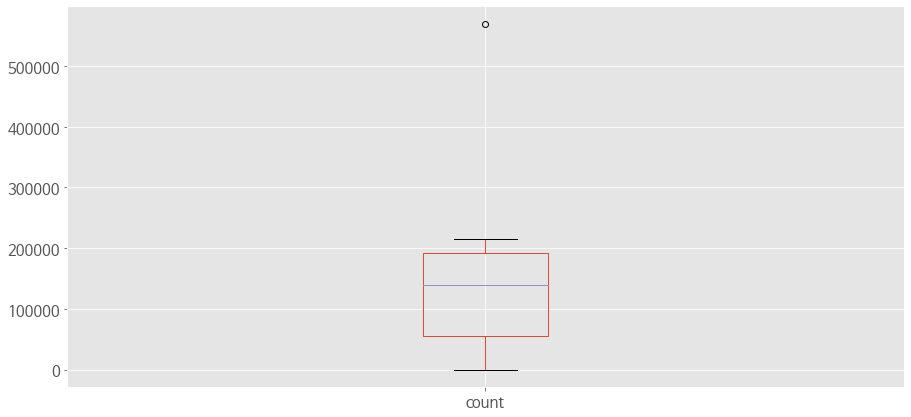

In [7]:
df_size.describe().boxplot(figsize=(15, 7))

In [8]:
reports.custom_display(df_size)

,count
index,
crawler-naver-economy-2021,337630
crawler-naver-international-2021,67644
crawler-naver-it-2021,59822
crawler-naver-living-2021,88317
crawler-naver-opinion-2021,15709
crawler-naver-politics-2021,214550
crawler-naver-society-2021,569684
crawler-naver-sports-2021,200261
crawler-naver-tv-2021,101837


<AxesSubplot:xlabel='index'>

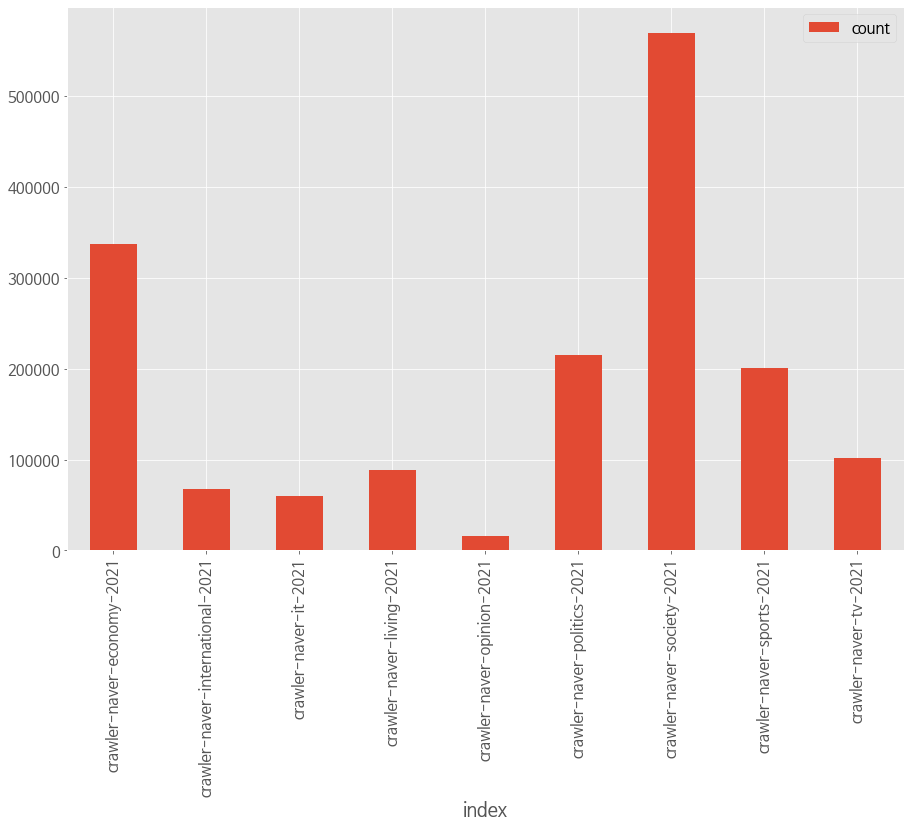

In [14]:
df_size.plot(kind='bar', figsize=(15, 10))

# 날짜별 기사 

In [10]:
index_list = [x for x in reports.state['list'] if set(x.split('-')).intersection(neddle) == neddle]

data = defaultdict(dict)
for index in tqdm(index_list):    
    resp = reports.get_date_histogram(
        index=index, 
        column='date', 
        interval='day', 
        date_format='YYYY-MM-dd',
        date_range=date_range
    )
    
    sec_name = index.split('-')[2]
    for r in resp['rows']:
        data[sec_name][r['date']] = r['count']
    
    sleep(3)

100%|██████████| 9/9 [00:27<00:00,  3.01s/it]


In [11]:
df_date = pd.DataFrame(data)

reports.custom_display(df_date)

,economy,international,it,living,opinion,politics,society,sports,tv
2021-03-01,1701,429,410,672,90,2012,4139,2104,679
2021-03-02,6667,970,1124,1549,270,3413,10710,2812,1678
2021-03-03,6163,1036,1116,1500,268,3438,10021,3056,1567
2021-03-04,6724,1010,1024,1431,247,3976,10240,2445,1573
2021-03-05,4404,989,690,1254,210,3251,7825,2880,1488
2021-03-06,666,475,122,456,85,817,2209,2260,702
2021-03-07,2058,491,405,541,85,1536,3600,2792,668
2021-03-08,5498,926,955,1241,269,3410,9402,2283,1485
2021-03-09,6228,1047,1026,1329,253,3587,9014,3735,1533
2021-03-10,6197,1072,1136,1406,277,3404,9054,3060,1519


,economy,international,it,living,opinion,politics,society,sports,tv
count,22,22,22,22,22,22,22,22,22
mean,4212,832,730,1063,193,2683,6830,2722,1220
std,2393,346,403,488,86,1350,3415,685,504
min,20,41,6,66,34,45,184,684,43
25%,2115,493,406,626,106,1592,3735,2365,702
50%,5202,938,876,1248,227,3283,8412,2815,1486
75%,6220,1044,1094,1436,267,3524,9652,3059,1567
max,6724,1428,1183,1682,310,4717,10710,3883,1885


<AxesSubplot:>

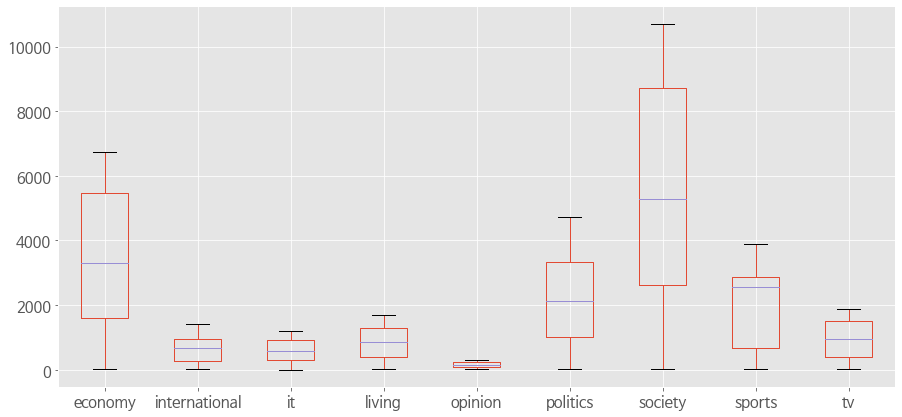

In [12]:
reports.custom_display(df_date.describe())

df_date.describe().boxplot(figsize=(15, 7))

<AxesSubplot:>

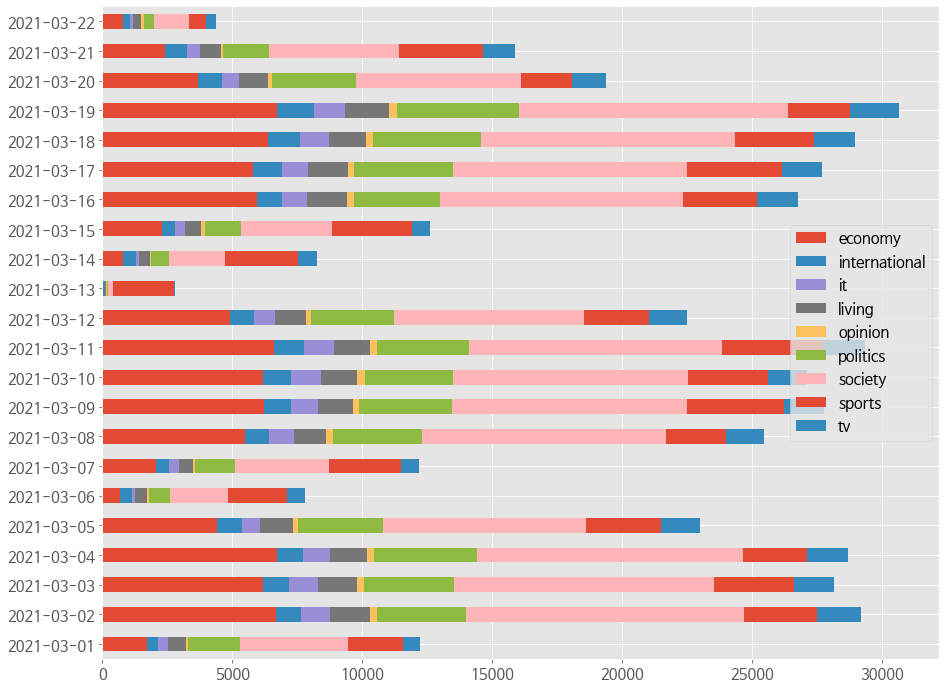

In [13]:
df_date.plot(kind='barh', stacked=True, figsize=(15, 12))